<a href="https://colab.research.google.com/github/petiesmo/AOC2020/blob/master/AOC2020_17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AOC2020 - Day 17
## Power module startup states

'Neighbors' = 26 adjacent cells (3x3x3 cube - current cell)

Rules: If {cell=active & {2,3} neighbors=active} = Inactive

if {cell!=active & {3} neighbors=active} = Active

Part 1: How many cubes are left in the active state after the sixth cycle? (401 with my input)

Part 2: Control 'volume' is actually a 4th dimensional space.  Same rules apply

How many cubes are left in the active state? (2224 with my input)

Note: Day 17 Part A and Part B are in 2 separate files, to avoid confusion between 3rd and 4th dimensional info

In [3]:
#Convert input deck to a list of lists
import numpy as np
from pprint import pprint
#Import from input deck
input_file = r"AOC2020_17.inp"
with open(input_file,"r") as file:
    lines = file.readlines()

t0 = [list(line.rstrip('\n')) for line in lines]
t0 

[['#', '.', '.', '.', '#', '.', '#', '.'],
 ['.', '.', '#', '.', '#', '.', '#', '#'],
 ['.', '.', '#', '.', '.', '#', '.', '.'],
 ['.', '.', '.', '.', '.', '#', '#', '#'],
 ['.', '.', '.', '#', '.', '#', '.', '#'],
 ['#', '.', '#', '.', '#', '#', '.', '.'],
 ['#', '#', '#', '#', '#', '.', '.', '.'],
 ['.', '#', '.', '#', '.', '#', '#', '.']]

In [4]:
#Convert list of lists to a 4D Numpy array (of 1s & 0s)
start_state = np.array(t0)
vfunc = np.vectorize(lambda x: 1 if x=='#' else 0)
state0 = vfunc(start_state)
cube0 = state0[np.newaxis,np.newaxis,:,:]
cube0.shape

(1, 1, 8, 8)

In [5]:
#Generate control volume by padding the start field with enough values to cover cycles 
ncycles = 6
npad = ncycles + 1
cvol0 = np.pad(cube0,((npad,npad),),mode='constant')
cvol = []
cvol.append(cvol0)  #Time step zero
cvol[0][npad,npad,:,:] #Control volume at zero time step (starting slice only)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0,

In [6]:
#Cycle through interior of array, checking neighbors to evaluate new Active/Inactive condition
def eval_new_4state(old_state):
    dh,dz,dy,dx = old_state.shape  #z,y,x = slice,row,col
    active_neighbors = lambda h,z,y,x: np.sum(old_state[h-1:h+2,z-1:z+2,y-1:y+2,x-1:x+2])
    new_state = np.zeros(old_state.shape, dtype=int)
    for ih in range(1,dh):
        for iz in range(1,dz):      #Don't evaluate outer crust
            for iy in range(1,dy):
                for ix in range(1,dx):     
                    if old_state[ih,iz,iy,ix] == 1:
                        new_state[ih,iz,iy,ix] = 1 if active_neighbors(ih,iz,iy,ix)-1 in [2,3] else 0
                    elif old_state[ih,iz,iy,ix] == 0:
                        new_state[ih,iz,iy,ix] = 1 if active_neighbors(ih,iz,iy,ix) == 3 else 0
                    else:
                        raise ValueError(f'Current state {old_state[ih,iz,iy,ix]} not recognized')

    return new_state

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0

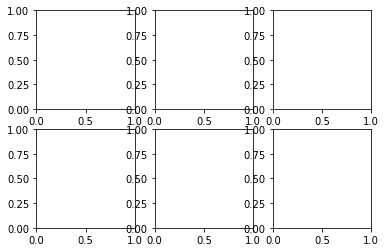

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig,axs = plt.subplots(2,3)
fig.figsize=plt.figaspect(0.5)
fig.projection = '3d'

#Loop through cycles
print(cvol[0][npad,npad,:,:])
for tstep in range(1,ncycles+1):
    old_state = cvol[tstep-1]
    new_state = eval_new_4state(old_state)
    cvol.append(new_state)
    print(f'Time step: {tstep}')
    print(f'Sum: {np.sum(new_state)}')
    #print(new_state[npad,:,:])

    #voxels = np.array(new_state, dtype=bool)
    #ax = axs[tstep//3+1,tstep%3+1] 
    #ax.plot(voxels[npad,:,:], 'tab:green')
    #ax.voxels(voxels, facecolors='blue',edgecolor='k')

print(cvol[-1][npad,npad,:,:])
#plt.show()
